# Bloch Sphere

In [12]:
import qutip
import numpy as np

In [13]:
b = qutip.Bloch()

In Bloch sphere, |0> point to the north pole and |0> point to the south pole

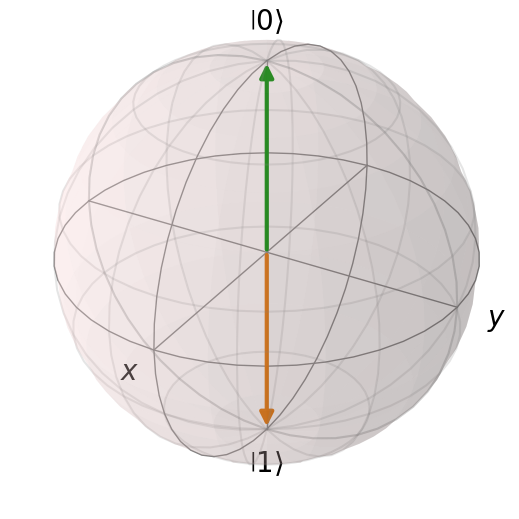

In [14]:
up = qutip.basis(2, 0)
down = qutip.basis(2, 1)
b.add_states(up)
b.add_states(down)
b.render()
b.show()

|+> point towards +X

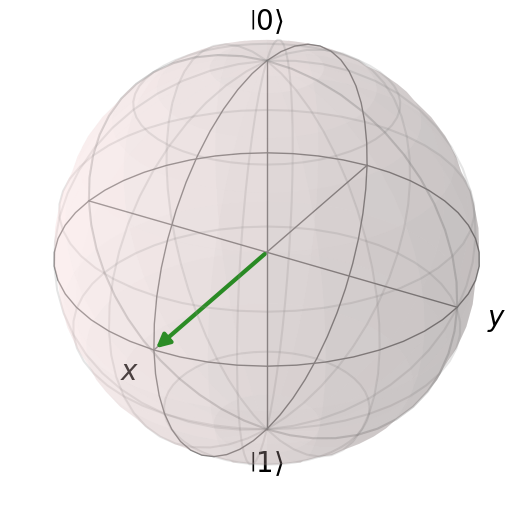

In [15]:
plus=1/np.sqrt(2)*(up+down)
b = qutip.Bloch()
b.add_states(plus)
b.render()
b.show()

# Convert the quantum state to what qutip can understand

In [32]:
def convert_vec_to_qutip_state(statearray:np.ndarray):
    assert(len(statearray==2))
    up = qutip.basis(2, 0)
    down = qutip.basis(2, 1)
    return statearray[0]*up+statearray[1]*down

In [33]:
from gates import *
from states import *

In [37]:
state=QuantumState(qubit_number=1)
H=Hadamard()
state.reset_state(np.matmul(H.matrix(),state.state_vector))
state.show_state_dirac()

(0.7071067690849304+0j)|0>+(0.7071067690849304+0j)|1>


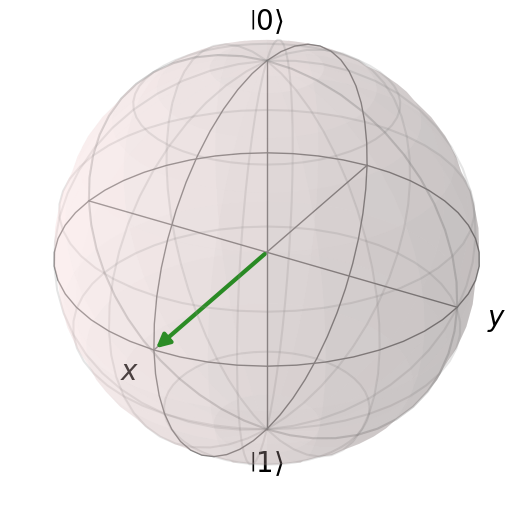

In [38]:
b = qutip.Bloch()
b.add_states(convert_vec_to_qutip_state(state.state_vector))
b.render()
b.show()

## Let's rotate the state along Z for 45 degree

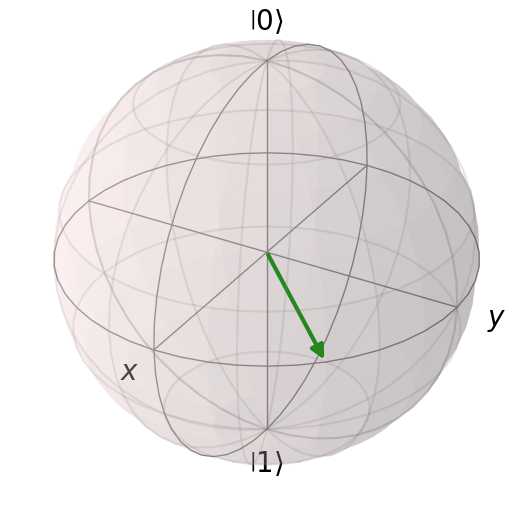

In [40]:
b = qutip.Bloch()

Rz=RotateZ(np.pi/4)

state=QuantumState(qubit_number=1)
H=Hadamard()
state.reset_state(np.matmul(H.matrix(),state.state_vector))
state.reset_state(np.matmul(Rz.matrix(),state.state_vector))

b.add_states(convert_vec_to_qutip_state(state.state_vector))
b.render()
b.show()

## We can have a path of a circle!

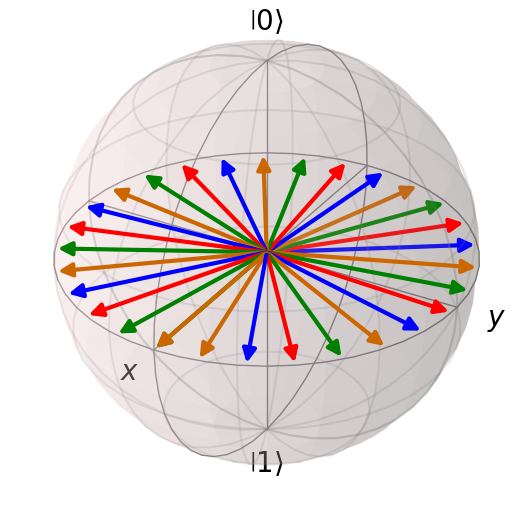

In [41]:
b = qutip.Bloch()

angleList=np.linspace(0,2,30)

for angle in angleList:
    Rz=RotateZ(angle*np.pi)
    state=QuantumState(qubit_number=1)
    H=Hadamard()
    state.reset_state(np.matmul(H.matrix(),state.state_vector))
    state.reset_state(np.matmul(Rz.matrix(),state.state_vector))
    b.add_states(convert_vec_to_qutip_state(state.state_vector))
    

b.render()
b.show()

# Or we can have a path at higher latitude

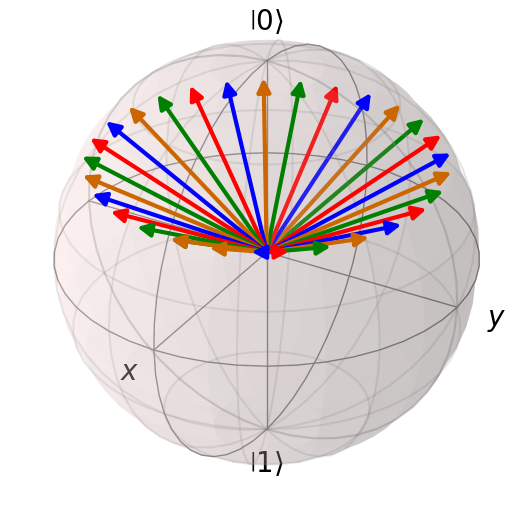

In [45]:
b = qutip.Bloch()

angleList=np.linspace(0,2,30)

for angle in angleList:
    Rz=RotateZ(angle*np.pi)
    state=QuantumState(qubit_number=1)
    Ry=RotateY(np.pi/3)
    state.reset_state(np.matmul(Ry.matrix(),state.state_vector))
    state.reset_state(np.matmul(Rz.matrix(),state.state_vector))
    b.add_states(convert_vec_to_qutip_state(state.state_vector))

b.render()
b.show()

# Rx,Ry,Rz is a unversal set, but not discrete nor finite

## Exercises

1. Please implement a function with two inputs theta, phi, which represent the final state we want on the Bloch sphere, and can generate the gate from {Rx,Ry,Rz} and rotate |0> to the final state. Plot the result on the Bloch sphere

# Is Pauli group universal?

Let's do an experiment, we start with a fixed state, and then we keep adding PauliX,Y,Z operator

In [66]:
from random import randint
coin=randint(0,3)

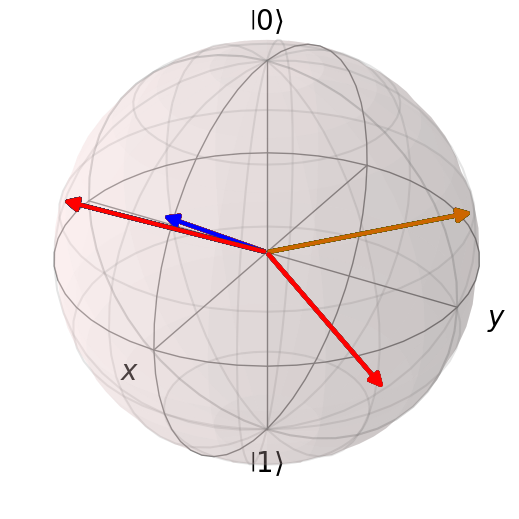

In [72]:
from random import randint
b = qutip.Bloch()

state=QuantumState(qubit_number=1)
Ry=RotateY(np.pi/3)
Rx=RotateX(np.pi/3)

state.reset_state(np.matmul(Rx.matrix(),state.state_vector))
state.reset_state(np.matmul(Ry.matrix(),state.state_vector))

X=PauliX()
Y=PauliY()
Z=PauliZ()

for index in range(0,100):
    coin=randint(1,3)
    if(coin==1):
        state.reset_state(np.matmul(X.matrix(),state.state_vector))
    elif(coin==2):
        state.reset_state(np.matmul(Y.matrix(),state.state_vector)) 
    else:
        state.reset_state(np.matmul(Z.matrix(),state.state_vector))         
    b.add_states(convert_vec_to_qutip_state(state.state_vector))

b.render()
b.show()

# If we add a T gate, things become different

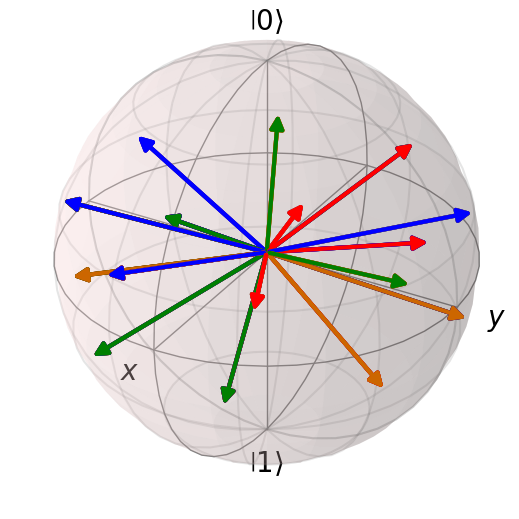

In [75]:
from random import randint
b = qutip.Bloch()

state=QuantumState(qubit_number=1)
Ry=RotateY(np.pi/3)
Rx=RotateX(np.pi/3)

state.reset_state(np.matmul(Rx.matrix(),state.state_vector))
state.reset_state(np.matmul(Ry.matrix(),state.state_vector))

X=PauliX()
Y=PauliY()
Z=PauliZ()
T=TGate()

for index in range(0,100):
    coin=randint(1,4)
    if(coin==1):
        state.reset_state(np.matmul(X.matrix(),state.state_vector))
    elif(coin==2):
        state.reset_state(np.matmul(Y.matrix(),state.state_vector)) 
    elif(coin==3):
        state.reset_state(np.matmul(Z.matrix(),state.state_vector))   
    else:
        state.reset_state(np.matmul(T.matrix(),state.state_vector))           
    b.add_states(convert_vec_to_qutip_state(state.state_vector))

b.render()
b.show()

# Exercises

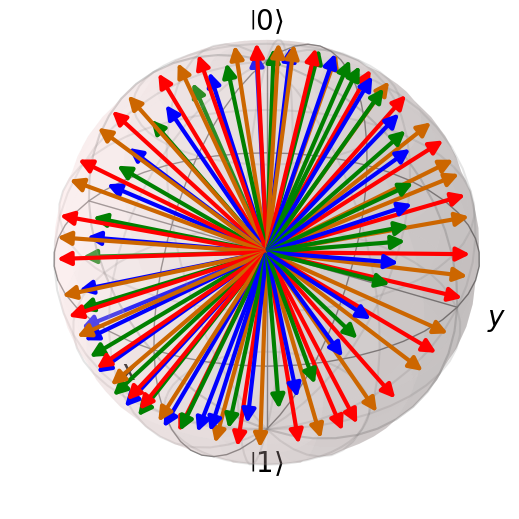

In [77]:
from random import randint
b = qutip.Bloch()

state=QuantumState(qubit_number=1)

Ry=RotateY(np.pi/3)
Rx=RotateX(np.pi/3)

state.reset_state(np.matmul(Rx.matrix(),state.state_vector))
state.reset_state(np.matmul(Ry.matrix(),state.state_vector))

H=Hadamard()
T=TGate()

for index in range(0,100):
    if index%2==0:
        state.reset_state(np.matmul(H.matrix(),state.state_vector))
    else:
        state.reset_state(np.matmul(T.matrix(),state.state_vector))        
    b.add_states(convert_vec_to_qutip_state(state.state_vector))

b.render()
b.show()

1. Try to use the hadamard gate and T gate the generate a dense subset of SU(2) and plot the result on Bloch sphere.